In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser
%matplotlib inline
from IPython.display import Image

In [2]:
#import data of August(7/29/2017 to 8/25/2017)
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
week_nums = [170805,170812,170819,170826]
turnstiles_df = get_data(week_nums)

In [3]:
#extract partial data
turnstiles_df.columns = ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES','EXITS']
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE","TIME"], inplace=True)
sample_df = turnstiles_df.iloc[:20000]
sample_df.is_copy = None

Challenge1

In [4]:
dictionary = {}
for name,group in sample_df.groupby(["C/A","UNIT","SCP","STATION"]):
    key = (name)
    value_list = []
    group.apply(lambda x:value_list.append([x.LINENAME, x.DIVISION,x.DATE,x.TIME,x.DESC,x.ENTRIES,x.EXITS]),axis = 1)
    dictionary[key] = value_list
dictionary;

Challenge2

In [5]:
sample_df["DT"] = pd.to_datetime(sample_df.DATE +" "+sample_df.TIME,format = "%m/%d/%Y %H:%M:%S")
dictionary2 = {}
def time_parser(timestring):
    return dateutil.parser.parse(timestring)
for name,group in sample_df.groupby(["C/A","UNIT","SCP","STATION"]):
    key = (name)
    value_list = []
    group.apply(lambda x:value_list.append([time_parser(str(x.DT)),x.ENTRIES]),axis = 1)
    dictionary2[key] = value_list
dictionary2;

Challenge3

In [6]:
sample_df[["PREV_DATE","PREV_ENTRIES"]] = (sample_df.groupby(["C/A","UNIT","SCP","STATION"])["DATE","ENTRIES"].
                                           transform(lambda grp:grp.shift(1)))                                  
sample_df.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
sample_df["Hourly_ENTRIES"] = abs(sample_df["ENTRIES"]-sample_df["PREV_ENTRIES"])
sample_df2 = sample_df.groupby(["C/A","UNIT","SCP","STATION","DATE"]).Hourly_ENTRIES.sum()
sample_df2 = sample_df2.reset_index().rename(columns = {"Hourly_ENTRIES":"Daily_ENTRIES"})
dictionary3 ={}
for name,group in sample_df2.groupby(["C/A","UNIT","SCP","STATION"]):
    key = (name)
    value_list = []
    group.apply(lambda x:value_list.append([time_parser(x.DATE),x.Daily_ENTRIES]),axis = 1)
    dictionary3[key] = value_list
dictionary3;

Challenge 4

([<matplotlib.axis.XTick at 0x116d34e48>,
 <a list of 7 Text xticklabel objects>)

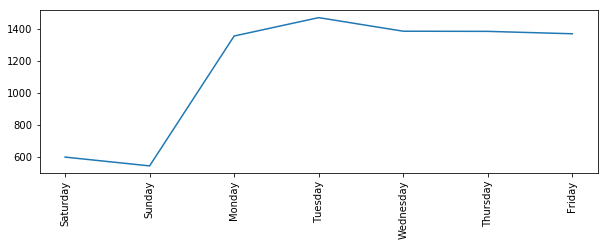

In [7]:
dates = [pd.to_datetime(x) for x in sample_df2.iloc[0:7].DATE.values]
counts = sample_df2["Daily_ENTRIES"][0:7].values
plt.figure(figsize=(10,3))
plt.plot(dates,counts)
labels = ["Saturday","Sunday",'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
plt.xticks(dates, labels, rotation='vertical')

challenge 5

In [8]:
dictionary4 = {}
sample_df2 = sample_df2.rename(columns = {"Daily_ENTRIES":"Daily_ENTRIES_STATION"})
sample_df3 = sample_df2.groupby(["C/A","UNIT","STATION","DATE"]).Daily_ENTRIES_STATION.sum().reset_index()
# sample_df3 = sample_df2.rename(columns = {"Daily_ENTRIES":"Daily_ENTRIES_STATION"})
# dictionary4 ={}
# for index,series in sample_df3.iterrows():
#     dictionary4[series.STATION,] = [series.DATE,series.Daily_ENTRIES_STATION]
dictionary4 = {}
for name,group in sample_df3.groupby(["C/A","UNIT","STATION"]):
    key = (name)
    value_list = []
    group.apply(lambda x:value_list.append([time_parser(x.DATE),x.Daily_ENTRIES_STATION]),axis = 1)
    dictionary4[key] = value_list
dictionary4;

challenge 6

In [9]:
sample_df3 = sample_df3.rename(columns = {"C/A":"C_A"})
sample_df4 = sample_df3.groupby(["STATION","DATE"]).Daily_ENTRIES_STATION.sum().reset_index()
dictionary5 = {}
for name,group in sample_df4.groupby("STATION"):
    key = (name)
    value_list = []
    group.apply(lambda x:value_list.append([time_parser(x.DATE),x.Daily_ENTRIES_STATION]),axis = 1)
    dictionary5[key] = value_list
dictionary5;

challenge 7

In [10]:
Dict_5_val= [x[1] for x in dictionary5["23 ST"]]
dictionary5["14 ST-UNION SQ"][1][0].strftime("%Y-%m-%d")
Dict_5_datetime = [x[0].strftime("%Y-%m-%d") for x in dictionary5["23 ST"]]

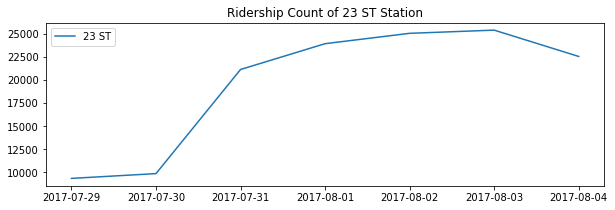

In [11]:
plt.figure(figsize=(10,3))
x_list = range(7)
plt.plot(x_list,Dict_5_val,label = "23 ST")
plt.xticks(x_list, Dict_5_datetime)
plt.legend()
plt.title("Ridership Count of 23 ST Station")

challenge 8

In [12]:
turnstiles_df_1 = turnstiles_df
turnstiles_df_1[["PREV_DATE","PREV_ENTRIES"]] = (turnstiles_df_1.groupby(["C/A","UNIT","SCP","STATION"])["DATE","ENTRIES"].
                                           transform(lambda grp:grp.shift(1)))                                  
turnstiles_df_1.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
turnstiles_df_1["Hourly_ENTRIES"] = abs(turnstiles_df_1["ENTRIES"]-turnstiles_df_1["PREV_ENTRIES"])
turnstiles_df_1 = turnstiles_df_1.groupby(["C/A","UNIT","SCP","STATION","DATE"]).Hourly_ENTRIES.sum()
turnstiles_df_1 = turnstiles_df_1.reset_index().rename(columns = {"Hourly_ENTRIES":"Daily_ENTRIES"})

In [13]:
turnstiles_df_2 = turnstiles_df_1.groupby(["STATION","DATE"]).Daily_ENTRIES.sum().reset_index()
turnstiles_df_2["d_of_week"] = turnstiles_df_2.apply(lambda x:time_parser(x.DATE).weekday(),axis = 1)
sample_2 = turnstiles_df_2[turnstiles_df_2["STATION"] == "1 AV"]
sample_2.is_copy = False

([<matplotlib.axis.XTick at 0x116d49b70>,
 <a list of 7 Text xticklabel objects>)

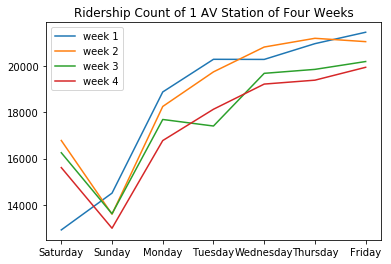

In [14]:
import itertools
temp_list = [[x]*7 for x in range(4)]
sample_2["index_c"] = list(itertools.chain.from_iterable(temp_list))
count = 1
for name, group in sample_2.groupby("index_c"):
    value_list = []
    group.apply(lambda x:value_list.append(x.Daily_ENTRIES),axis=1)
    plt.plot(range(7),value_list)
    plt.legend(["Week %d"%(count)])
    
plt.title("Ridership Count of 1 AV Station of Four Weeks")
plt.legend(["week 1","week 2","week 3","week 4"])
labels = (["Saturday","Sunday",'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.xticks(range(7), labels)

Challenge 9

In [15]:
# Find the station with most people for every week
turnstiles_df_2["formatted_datetime"] = pd.to_datetime(turnstiles_df_2["DATE"],format = "%m/%d/%Y")
turnstiles_df_2["WEEK_NUMBER"]=turnstiles_df_2["formatted_datetime"].dt.week-29
turnstiles_df_4 = turnstiles_df_2.groupby(["WEEK_NUMBER","STATION"]).agg({"Daily_ENTRIES":sum})
turnstiles_df_4 = turnstiles_df_4["Daily_ENTRIES"].groupby(level=0,
                                                           group_keys = False).apply(lambda x:
                                                                    x.sort_values(ascending=False)).reset_index()
turnstiles_df_4["WEEK_NUMBER"].replace(1,"07/29/2017-07/30/2017",inplace = True)
turnstiles_df_4["WEEK_NUMBER"].replace(2,"07/31/2017-08/06/2017",inplace = True)
turnstiles_df_4["WEEK_NUMBER"].replace(3,"07/31/2017-08/06/2017",inplace = True)
turnstiles_df_4["WEEK_NUMBER"].replace(4,"08/14/2017-08/20/2017",inplace = True)
turnstiles_df_4["WEEK_NUMBER"].replace(5,"08/21/2017-08/25/2017",inplace = True)
dictionary7 = {}
for name,group in turnstiles_df_4.groupby("WEEK_NUMBER"):
    key = (name)
    value_list = []
    group.apply(lambda x:value_list.append([x.STATION,x.Daily_ENTRIES]),axis = 1)
    dictionary7[key] = value_list
dictionary7; #final answer

#Find the station with most people over 5 weeks.
turnstiles_df_5 = turnstiles_df_2.groupby(["STATION"]).agg({"Daily_ENTRIES":sum})
turnstiles_df_5.sort_values("Daily_ENTRIES",ascending=False).head();#final answer



Challenge 10

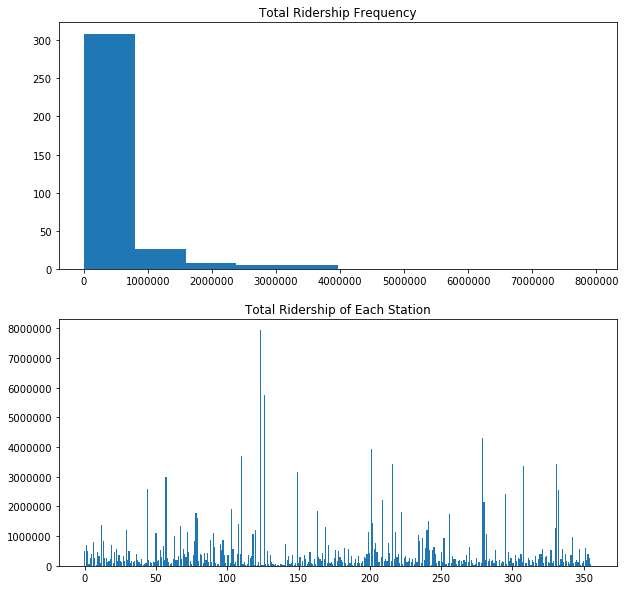

In [17]:
#filtering unreasonable data i.e extremely large or small 
total_rideship_counts = (turnstiles_df_5[(turnstiles_df_5["Daily_ENTRIES"]>1000)
                                         &(turnstiles_df_5["Daily_ENTRIES"]<10000000)]["Daily_ENTRIES"].values)
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

ax[0].hist(total_rideship_counts)
ax[0].set_title("Total Ridership Frequency")

indices = range(len(total_rideship_counts))
ax[1].bar(indices, total_rideship_counts)
ax[1].set_title("Total Ridership of Each Station")